In [ ]:
from PIL import Image, ImageDraw, ImageFont
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
from tensorflow.keras import utils
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization,Input
from tensorflow.keras.models import Model,load_model
from IPython.display import SVG
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model

In [ ]:
print(os.listdir("input"))

['train', '.ipynb_checkpoints', 'labels_train']


In [ ]:
df_train = pd.read_csv('input/labels_train/nlvnpf-0137-01-001.txt', header=None)
print(df_train)

                                         0
0    0 0.913333 0.332787 0.033333 0.039344
1    0 0.502222 0.144262 0.044444 0.036066
2    0 0.705000 0.330328 0.034444 0.040984
3    0 0.758333 0.622131 0.036667 0.044262
4    0 0.347222 0.205738 0.036667 0.047541
..                                     ...
144  0 0.654444 0.868852 0.033333 0.039344
145  0 0.241111 0.666393 0.040000 0.040984
146  0 0.810556 0.787705 0.034444 0.040984
147  0 0.502222 0.244262 0.042222 0.042623
148  0 0.345556 0.250000 0.035556 0.037705

[149 rows x 1 columns]


In [ ]:
def visualize_training_data(image_fn, labels):
    imsource = Image.open(image_fn).convert('RGBA')
    width, height = imsource.size
    bbox_canvas = Image.new('RGBA', imsource.size)
    char_canvas = Image.new('RGBA', imsource.size)
    bbox_draw = ImageDraw.Draw(bbox_canvas)

    char_draw = ImageDraw.Draw(char_canvas)

    for codepoint, x, y, w, h in labels:
        x, y, w, h = float(x)*width, float(y)*height, float(w)*width, float(h)*height
        bbox_draw.rectangle((x-w/2, y-h/2, x+w/2, y+h/2), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))
        Croped_image = imsource.crop((x-w/2, y-h/2, x+w/2, y+h/2))
        # plt.figure()
        # plt.imshow(Croped_image)
        # plt.show()

    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB")
    return np.asarray(imsource)



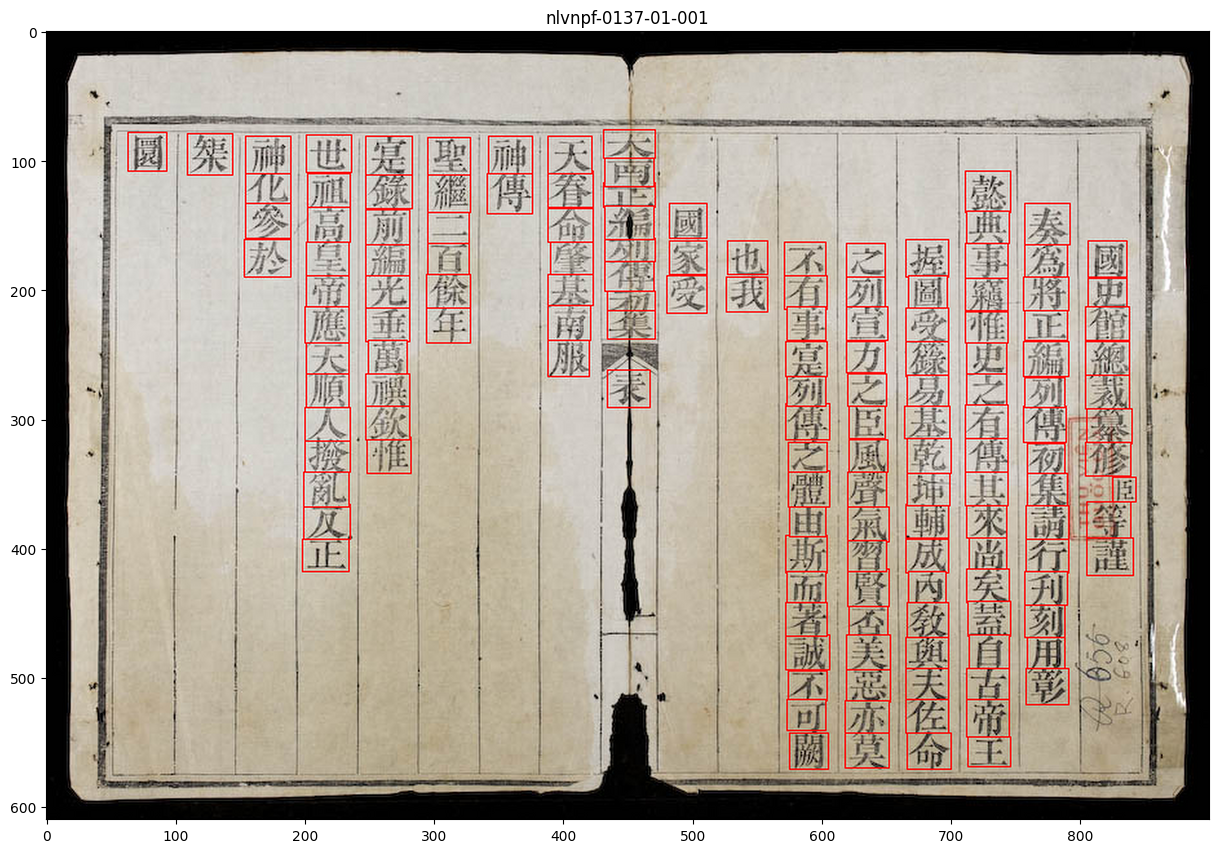

In [ ]:

for i in range(1):
    labels = df_train
    labels = np.array(labels[0].str.split().tolist())
    viz = visualize_training_data('input/train/nlvnpf-0137-01-001.jpg', labels)

    plt.figure(figsize=(15, 15))
    plt.title('nlvnpf-0137-01-001')
    plt.imshow(viz, interpolation='lanczos')
    plt.show()